# Heart Disease Diagnosis model

For this project, we'll try out several models to find out the best model.
Let's start by importing and downloading (if necessary, the important libraries to be used)

In [1]:
#!pip install mlxtend

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, auc, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import eli5
from eli5.sklearn import PermutationImportance
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from mlxtend.classifier import StackingCVClassifier
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')

D:\Users\holar\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
D:\Users\holar\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


Since we're using several models we'll be creating functions to split our data and train our model

In [3]:
def split_data(x,y):
    '''Inputs: independent variables, dependent variables
        output: a train and test portion of the data'''
    x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=2)
    # the random state was given a value so our results can be reproduced
    print('training size :{}, \n test size :{}'.format(x_train.shape, x_test.shape))
    
    return x_train, x_test, y_train, y_test

In [4]:
def train_model(x,y, model):
    '''Receives the data and the model to be trained as inputs and prints the accuracy on the test data and train data'''
    x_train, x_test, y_train, y_test=split_data(x,y)
    
    model.fit(x_train, y_train)
    
    print("accuracy on test data : {}".format(model.score(x_test, y_test)))
    
    print("accuracy on train data: {}".format(model.score(x_train, y_train)))

In [5]:
def train_Model(x,y, model):
    '''Receives the data and the model to be trained as inputs and prints the accuracyon the test 
    and train data while also plottinggraphs which helps us know how accurate our model is on the test data'''
    x_train, x_test, y_train, y_test = split_data(x,y)
    model.fit(x_train, y_train)
    
    print("accuracy on test data : {}".format(model.score(x_test, y_test)))
    
    print("accuracy on train data: {}".format(model.score(x_train, y_train)))
    
    
    prediction= model.predict(x_test)
    
    print(classification_report(y_test, prediction))
    
    confusion_plot(y_test, prediction)
    
    distplott(y_test, prediction)
    
    roc_plot(y_test, prediction)


In [6]:
def roc_plot(y_test, pred):
    '''Receives the actual values and predicted values as inputs and plots an ROC graph'''
    fpr, tpr, _ = roc_curve(y_test, pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw=2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, 
             label='ROC Curve (area = %0.2f)' %roc_auc)
    plt.plot([0,1], [0,1], color='navy',lw=lw, linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False positive Rate')
    
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc='lower right')
    plt.show

In [7]:
def pca(data, count):
    pca = PCA(n_components=count).fit_transform(data)
    return pca

In [8]:
def confusion_plot(test_data, predicted_data):
    '''Recieves the actual and predicted values as inputs and plots confusion matrix graph as well as a precision graph'''
    C = confusion_matrix(test_data, predicted_data)
    B = C/C.sum(axis=0)
    sns.heatmap(C, annot=True, fmt='.1f')
    plt.xlabel('predicted data')
    plt.ylabel('actual data')
    plt.show()
    
    sns.heatmap(B, annot=True, fmt='.2f')
    plt.xlabel('predicted data')
    plt.ylabel('actual data')
    plt.show()


In [9]:
def distplott(act, pred):
    plt.figure(figsize=[5, 5])
    ax1=sns.distplot(pred, hist=False, color='pink', label='Prediction')
    sns.distplot(act, hist=False, color='green', label='Actual data', ax=ax1)
    plt.show()

In [10]:
def feature_imp(x, y, model):
    _, x_test, _, y_test= split_data(x,y)
    perm = PermutationImportance(model).fit(x_test, y_test)
    return eli5.show_weights(perm, feature_names = x_test.columns.tolist())

In [11]:
df=pd.read_csv(r"D:\Downloads\data Science pract\heart-disease-uci\heart data.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Note**: The data is clean and has been checked prior to the creation of this notebook

In [12]:
xgb= XGBClassifier()
dtc = DecisionTreeClassifier()
clf = GaussianNB()
lr=LogisticRegression()

In [13]:
#assigning variables to the independent and dependent variables
x = df.drop(['target'], axis=1)
#x=x.values
y=df.target
y=y.values

In [14]:
train_model(x, y, xgb)

training size :(242, 13), 
 test size :(61, 13)
accuracy on test data : 0.8524590163934426
accuracy on train data: 1.0


As shown above, xgboost performs well in the test data but overfitting the training data

In [15]:
#let's plot a graph showing the important features for this model
xgb.feature_importances_

array([0.03310146, 0.06862222, 0.17628443, 0.0270577 , 0.03110331,
       0.04775894, 0.0340265 , 0.03748947, 0.17403798, 0.05834336,
       0.07695502, 0.12165924, 0.11356039], dtype=float32)

cp, exang, ca and thal are of high importance to our xgboost model

In [16]:
train_model(x,y, dtc)

training size :(242, 13), 
 test size :(61, 13)
accuracy on test data : 0.7868852459016393
accuracy on train data: 1.0


In [17]:
train_model(x,y, clf)

training size :(242, 13), 
 test size :(61, 13)
accuracy on test data : 0.8852459016393442
accuracy on train data: 0.8181818181818182


In [18]:
train_model(x, y, lr)

training size :(242, 13), 
 test size :(61, 13)
accuracy on test data : 0.9016393442622951
accuracy on train data: 0.8264462809917356


So far, logistic regression has the highest accuracy on the test data set.

# Feature importance

In [19]:
feature_imp(x,y,lr)

training size :(242, 13), 
 test size :(61, 13)


Weight,Feature
0.0820 ± 0.0718,ca
0.0557 ± 0.0675,thalach
0.0492 ± 0.0293,thal
0.0459 ± 0.0564,cp
0.0328 ± 0.0359,oldpeak
0.0230 ± 0.0334,sex
0.0197 ± 0.0245,restecg
0.0164 ± 0.0207,slope
0.0131 ± 0.0382,exang
0.0033 ± 0.0131,age


I dropped features that were of the lowest importance iteratively. 'thalach' was part of the selection initially but I realised that when dropped, the accuracy reduced drastically.


In [20]:
df1 = df.drop(['age','fbs','trestbps','restecg','chol','sex','slope','thal'], axis=1)
x1 = df1.drop(['target'], axis=1)
y1 = df1.target

In [21]:
df1.head()

,cp,thalach,exang,oldpeak,ca,target
0,3,150,0,2.3,0,1
1,2,187,0,3.5,0,1
2,1,172,0,1.4,0,1
3,1,178,0,0.8,0,1
4,0,163,1,0.6,0,1


In [22]:
df1.corr()

,cp,thalach,exang,oldpeak,ca,target
cp,1.000000,0.295762,-0.394280,-0.149230,-0.181053,0.433798
thalach,0.295762,1.000000,-0.378812,-0.344187,-0.213177,0.421741
exang,-0.394280,-0.378812,1.000000,0.288223,0.115739,-0.436757
oldpeak,-0.149230,-0.344187,0.288223,1.000000,0.222682,-0.430696
ca,-0.181053,-0.213177,0.115739,0.222682,1.000000,-0.391724
target,0.433798,0.421741,-0.436757,-0.430696,-0.391724,1.000000


In [23]:
lr1 = LogisticRegression()
train_model(x1, y1, lr1)

training size :(242, 5), 
 test size :(61, 5)
accuracy on test data : 0.9344262295081968
accuracy on train data: 0.8057851239669421


As we can see, our model has improved in test data accuracy but reduced in train data accuracy.

In [24]:
feature_imp(x1,y1,lr1)

training size :(242, 5), 
 test size :(61, 5)


Weight,Feature
0.1311 ± 0.0415,oldpeak
0.1148 ± 0.0464,ca
0.1115 ± 0.0759,cp
0.0787 ± 0.0245,exang
0.0426 ± 0.0393,thalach


Now let's plot our graphs reflecting the accuracy of our new model's predictions

training size :(242, 5), 
 test size :(61, 5)
accuracy on test data : 0.9344262295081968
accuracy on train data: 0.8057851239669421
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        32
           1       0.88      1.00      0.94        29

   micro avg       0.93      0.93      0.93        61
   macro avg       0.94      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



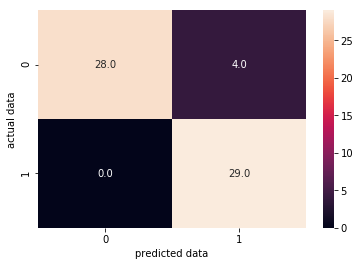

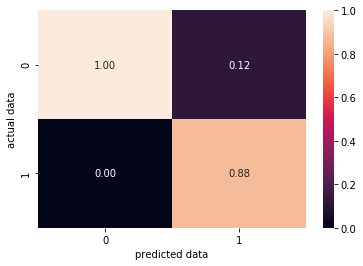

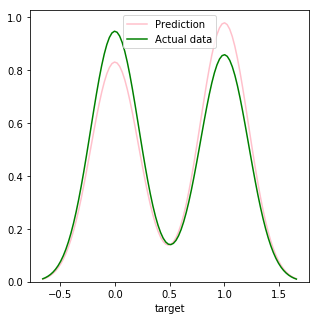

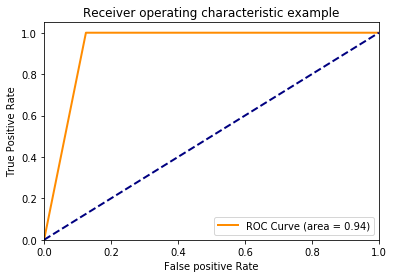

In [25]:
train_Model(x1, y1, lr1)

# Applying pca

Let's apply pca to the whole dataset and check out the improvements

In [26]:
X= pca(df, 13)

In [27]:
pca_lr = LogisticRegression
train_model(X, y, lr)

training size :(242, 13), 
 test size :(61, 13)
accuracy on test data : 0.9672131147540983
accuracy on train data: 0.9545454545454546


# Using Neural Networks

Let's create a neural network and compare the performance against our current best model(logistic regression)

I had a lot of issues with over fitting hence the numerous dropout calls.

In [28]:
model1=tf.keras.Sequential([
    
    
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model2=model1

In [29]:
adam = tf.keras.optimizers.Adam(lr=0.001)
model1.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
x_nn = x.values
y_nn = y
x_train, x_test, y_train, y_test= split_data(x_nn, y_nn)

training size :(242, 13), 
 test size :(61, 13)


In [31]:
model1.fit(x_train, y_train, epochs=200)

Train on 242 samples
Epoch 1/200
242/242 [==============================] - 0s 2ms/sample - loss: 1.0443 - accuracy: 0.6157
Epoch 2/200
242/242 [==============================] - 0s 239us/sample - loss: 0.9089 - accuracy: 0.5702
Epoch 3/200
242/242 [==============================] - 0s 227us/sample - loss: 0.7848 - accuracy: 0.7025
Epoch 4/200
242/242 [==============================] - 0s 223us/sample - loss: 0.6664 - accuracy: 0.6860
Epoch 5/200
242/242 [==============================] - 0s 247us/sample - loss: 0.7213 - accuracy: 0.6901
Epoch 6/200
242/242 [==============================] - 0s 495us/sample - loss: 0.6463 - accuracy: 0.6942
Epoch 7/200
242/242 [==============================] - 0s 396us/sample - loss: 0.5702 - accuracy: 0.7190
Epoch 8/200
242/242 [==============================] - 0s 474us/sample - loss: 0.6735 - accuracy: 0.7107
Epoch 9/200
242/242 [==============================] - 0s 544us/sample - loss: 0.7165 - accuracy: 0.7397
Epoch 10/200
242/242 [==============

242/242 [==============================] - 0s 227us/sample - loss: 0.3783 - accuracy: 0.8140
Epoch 79/200
242/242 [==============================] - 0s 239us/sample - loss: 0.3939 - accuracy: 0.8264
Epoch 80/200
242/242 [==============================] - 0s 239us/sample - loss: 0.3752 - accuracy: 0.8182
Epoch 81/200
242/242 [==============================] - 0s 247us/sample - loss: 0.4218 - accuracy: 0.8182
Epoch 82/200
242/242 [==============================] - 0s 235us/sample - loss: 0.3638 - accuracy: 0.8140
Epoch 83/200
242/242 [==============================] - 0s 231us/sample - loss: 0.3621 - accuracy: 0.8223
Epoch 84/200
242/242 [==============================] - 0s 214us/sample - loss: 0.3459 - accuracy: 0.8306
Epoch 85/200
242/242 [==============================] - 0s 223us/sample - loss: 0.3313 - accuracy: 0.8388
Epoch 86/200
242/242 [==============================] - 0s 223us/sample - loss: 0.3462 - accuracy: 0.8264
Epoch 87/200
242/242 [==============================] - 0s 

242/242 [==============================] - 0s 235us/sample - loss: 0.2937 - accuracy: 0.8760
Epoch 155/200
242/242 [==============================] - 0s 243us/sample - loss: 0.2961 - accuracy: 0.8760
Epoch 156/200
242/242 [==============================] - 0s 268us/sample - loss: 0.3080 - accuracy: 0.8554
Epoch 157/200
242/242 [==============================] - 0s 321us/sample - loss: 0.3354 - accuracy: 0.8636
Epoch 158/200
242/242 [==============================] - 0s 251us/sample - loss: 0.2984 - accuracy: 0.8678
Epoch 159/200
242/242 [==============================] - 0s 313us/sample - loss: 0.3062 - accuracy: 0.8760
Epoch 160/200
242/242 [==============================] - 0s 334us/sample - loss: 0.2903 - accuracy: 0.8719
Epoch 161/200
242/242 [==============================] - 0s 321us/sample - loss: 0.3369 - accuracy: 0.8430
Epoch 162/200
242/242 [==============================] - 0s 235us/sample - loss: 0.2880 - accuracy: 0.8760
Epoch 163/200
242/242 [============================

In [32]:
pred=model1.predict(x_test)
pred=np.around(pred)

Accuracy : 0.8524590163934426
              precision    recall  f1-score   support

           0       0.93      0.78      0.85        32
           1       0.79      0.93      0.86        29

   micro avg       0.85      0.85      0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



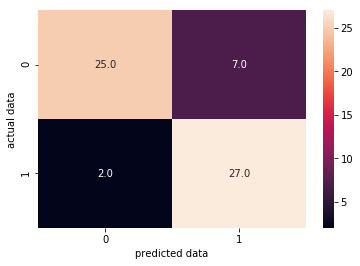

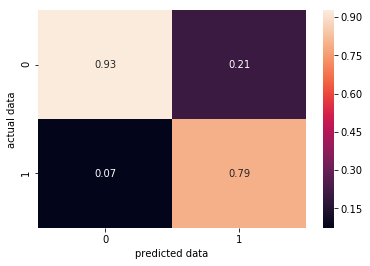

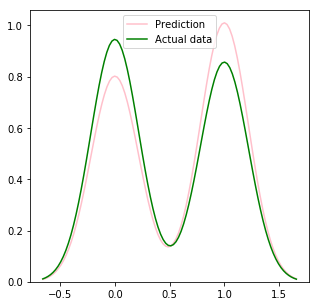

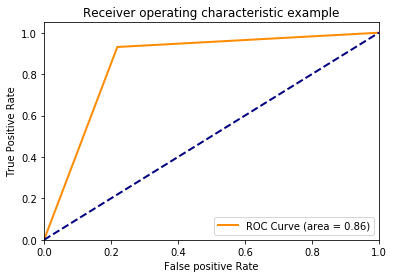

In [33]:
print('Accuracy :',accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
confusion_plot(y_test, pred)
distplott(y_test, pred)
roc_plot(y_test, pred)

Accuracy : 0.859504132231405
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       106
           1       0.88      0.87      0.87       136

   micro avg       0.86      0.86      0.86       242
   macro avg       0.86      0.86      0.86       242
weighted avg       0.86      0.86      0.86       242



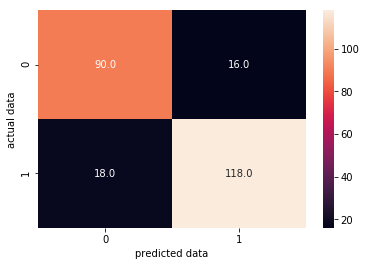

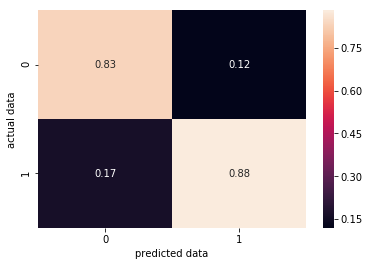

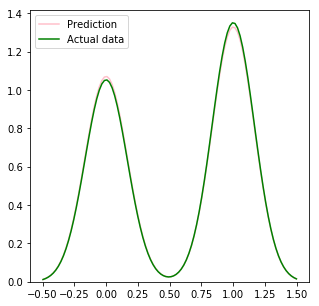

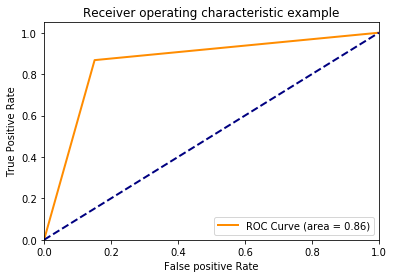

In [34]:
predd=model1.predict(x_train)
predd=np.around(predd)
print('Accuracy :', accuracy_score(y_train, predd))
print(classification_report(y_train, predd))
confusion_plot(y_train, predd)
distplott(y_train, predd)
roc_plot(y_train, predd)

Neural network on pca dataset

In [35]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
x_train, x_test, y_train, y_test=split_data(X, y)

training size :(242, 13), 
 test size :(61, 13)


In [37]:
model2.fit(x_train, y_train, epochs=200)

Train on 242 samples
Epoch 1/200
242/242 [==============================] - 0s 2ms/sample - loss: 2.1885 - accuracy: 0.6446
Epoch 2/200
242/242 [==============================] - 0s 284us/sample - loss: 1.1628 - accuracy: 0.5083
Epoch 3/200
242/242 [==============================] - 0s 264us/sample - loss: 0.7976 - accuracy: 0.6488
Epoch 4/200
242/242 [==============================] - 0s 256us/sample - loss: 0.7778 - accuracy: 0.6446
Epoch 5/200
242/242 [==============================] - 0s 268us/sample - loss: 0.6917 - accuracy: 0.6653
Epoch 6/200
242/242 [==============================] - 0s 239us/sample - loss: 0.6480 - accuracy: 0.6612
Epoch 7/200
242/242 [==============================] - 0s 297us/sample - loss: 0.6210 - accuracy: 0.6942
Epoch 8/200
242/242 [==============================] - 0s 272us/sample - loss: 0.5862 - accuracy: 0.7231
Epoch 9/200
242/242 [==============================] - 0s 235us/sample - loss: 0.5109 - accuracy: 0.7355
Epoch 10/200
242/242 [==============

242/242 [==============================] - 0s 218us/sample - loss: 0.0758 - accuracy: 0.9628
Epoch 79/200
242/242 [==============================] - 0s 235us/sample - loss: 0.0735 - accuracy: 0.9793
Epoch 80/200
242/242 [==============================] - 0s 214us/sample - loss: 0.0600 - accuracy: 0.9793
Epoch 81/200
242/242 [==============================] - 0s 214us/sample - loss: 0.0832 - accuracy: 0.9587
Epoch 82/200
242/242 [==============================] - 0s 231us/sample - loss: 0.0793 - accuracy: 0.9669
Epoch 83/200
242/242 [==============================] - 0s 227us/sample - loss: 0.1757 - accuracy: 0.9339
Epoch 84/200
242/242 [==============================] - 0s 223us/sample - loss: 0.1076 - accuracy: 0.9628
Epoch 85/200
242/242 [==============================] - 0s 231us/sample - loss: 0.0730 - accuracy: 0.9628
Epoch 86/200
242/242 [==============================] - 0s 235us/sample - loss: 0.0965 - accuracy: 0.9504
Epoch 87/200
242/242 [==============================] - 0s 

242/242 [==============================] - 0s 239us/sample - loss: 0.0103 - accuracy: 1.0000
Epoch 155/200
242/242 [==============================] - 0s 247us/sample - loss: 0.0546 - accuracy: 0.9835
Epoch 156/200
242/242 [==============================] - 0s 247us/sample - loss: 0.0290 - accuracy: 0.9876
Epoch 157/200
242/242 [==============================] - 0s 235us/sample - loss: 0.0223 - accuracy: 0.9959
Epoch 158/200
242/242 [==============================] - 0s 227us/sample - loss: 0.0285 - accuracy: 0.9959
Epoch 159/200
242/242 [==============================] - 0s 256us/sample - loss: 0.0178 - accuracy: 0.9917
Epoch 160/200
242/242 [==============================] - 0s 239us/sample - loss: 0.0266 - accuracy: 0.9835
Epoch 161/200
242/242 [==============================] - 0s 227us/sample - loss: 0.0174 - accuracy: 0.9959
Epoch 162/200
242/242 [==============================] - 0s 227us/sample - loss: 0.0232 - accuracy: 0.9876
Epoch 163/200
242/242 [============================

In [38]:
pred2 = model2.predict(x_test)
pred2=np.around(pred2)
print(classification_report(y_test, pred2))
print('Accuracy :', accuracy_score(y_test,pred2))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        32
           1       0.94      1.00      0.97        29

   micro avg       0.97      0.97      0.97        61
   macro avg       0.97      0.97      0.97        61
weighted avg       0.97      0.97      0.97        61

Accuracy : 0.9672131147540983


# SUMMARY:
The logistic regression was our best model out performing every other model used including neural network and xgboost on both datasets (pca and the actual dataset). The closest model to the logistic regression model was the Neural network. I have to say, The performance of any neural network model depends on the architect of the layers. Maybe with little tweaks, the neural network should be the best performer.

Now let's show our important features for our logistic regression model